In [5]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from google.colab import drive
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

In [9]:
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
#assume 80-20 train test split
#rule of thumb is k = 5 to 10
#use both adaboost and randomtree


In [15]:
#train size
RandomForest_dict = {"KValue":[],"TrainLoss":[],"TestLoss":[]}
AdaBoost_dict = {"KValue":[],"TrainLoss":[],"TestLoss":[]}


for k in range(5,10):
  #split x into k pieces
  x_temptrain = np.array_split(x_train,k)
  y_temptrain = np.array_split(y_train,k)

  #split y into k pieces
  y_temptest = np.array_split(x_test,k)
  y_temptest = np.array_split(y_test,k)

  rf = RandomForestClassifier(criterion = "gini", n_estimators=996, max_depth=16, random_state=42)
  abc = AdaBoostClassifier(n_estimators=100, random_state=42)

  for i in range(0,k):
    rf.fit(x_temptrain[i], y_temptrain[i])
    abc.fit(x_temptrain[i], y_temptrain[i])

  RandomForest_dict["KValue"].append(k)
  RandomForest_dict["TrainLoss"].append(1-(rf.score(x_train, y_train)))
  RandomForest_dict["TestLoss"].append(1-(rf.score(x_test, y_test)))

  AdaBoost_dict["KValue"].append(k)
  AdaBoost_dict["TrainLoss"].append(1-(rf.score(x_train, y_train)))
  AdaBoost_dict["TestLoss"].append(1-(rf.score(x_test, y_test)))


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarn

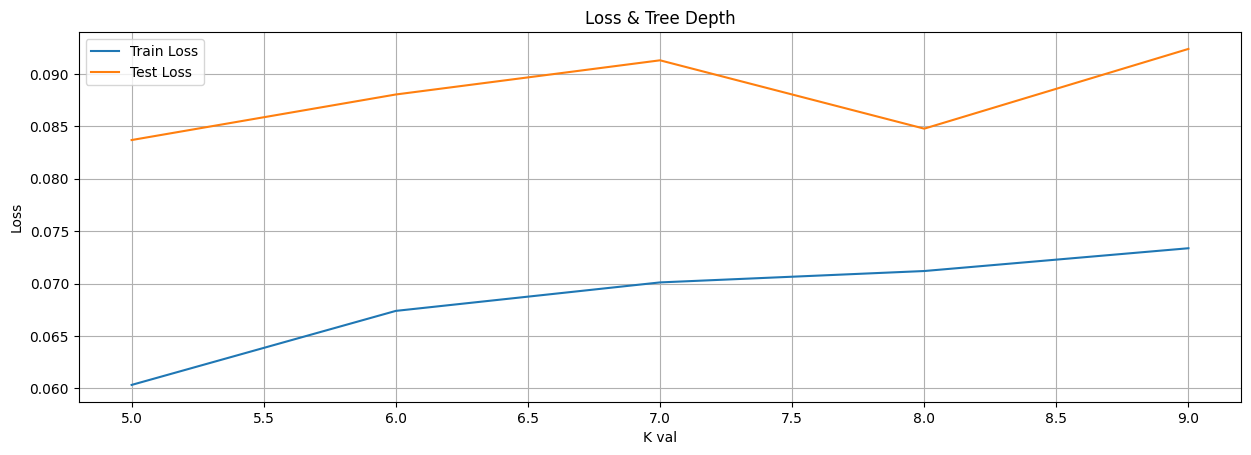

In [18]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("K val")
plt.ylabel("Loss")
plt.title("Loss & Tree Depth")

x_values = RandomForest_dict['KValue']

plt.plot(x_values, RandomForest_dict['TrainLoss'], label="Train Loss")
plt.plot(x_values, RandomForest_dict['TestLoss'], label="Test Loss")

plt.legend()
plt.show()